### Colorizing the GreyScale Images usign Auto Encoders and Decoders

In [2]:
# Importing Libraries

import keras
from keras.preprocessing import image
from keras.engine import Layer
from keras.layers import Conv2D, Conv3D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
from time import time
import numpy as np
import os
import random
import tensorflow as tf
from PIL import Image, ImageFile
import cv2

Using TensorFlow backend.


### Data Preprocessing

In [8]:
# Reading and Reshaping the images to the same size

list_images = [] # to store the 
dim = (256,256)
for filename in os.listdir('Dataset/Train/'):
    img = cv2.imread('Dataset/Train/' + str(filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    list_images.append(img)

# converting the images to a numpy array
list_images = np.array(list_images)

In [9]:
# shape of the images combined

print('Total Images : ', list_images.shape[0])
print('Shape of the Images : ', list_images.shape[1:])

Total Images :  10129
Shape of the Images :  (256, 256, 3)


In [10]:
# Splitting as traing and test

train = list_images[:9500]
test = list_images[9500:]

In [ ]:
# Normalizing and Converting the image from RGB to LAB

X =[]
Y =[]
i = 0
for img in train: 
    X_lab = rgb2lab(img)[:,:,0] # 1.0/255 indicates that we are using a 24-bit RGB color space
    Y_lab = rgb2lab(img)[:,:,1:]
    Y_lab = Y_lab/128
    X.append(X_lab)
    Y.append(Y_lab)
    i = i +1
    print('done',i )

X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 100
done 101
done 102
done 103
done 104
done 105
done 106
done 107
done 108
done 109
done 110
done 111
done 112
done 113
done 114
done 115
done 116
done 117
done 118
done 119
done 120
done 121
done 122
done 123
d

done 927
done 928
done 929
done 930
done 931
done 932
done 933
done 934
done 935
done 936
done 937
done 938
done 939
done 940
done 941
done 942
done 943
done 944
done 945
done 946
done 947
done 948
done 949
done 950
done 951
done 952
done 953
done 954
done 955
done 956
done 957
done 958
done 959
done 960
done 961
done 962
done 963
done 964
done 965
done 966
done 967
done 968
done 969
done 970
done 971
done 972
done 973
done 974
done 975
done 976
done 977
done 978
done 979
done 980
done 981
done 982
done 983
done 984
done 985
done 986
done 987
done 988
done 989
done 990
done 991
done 992
done 993
done 994
done 995
done 996
done 997
done 998
done 999
done 1000
done 1001
done 1002
done 1003
done 1004
done 1005
done 1006
done 1007
done 1008
done 1009
done 1010
done 1011
done 1012
done 1013
done 1014
done 1015
done 1016
done 1017
done 1018
done 1019
done 1020
done 1021
done 1022
done 1023
done 1024
done 1025
done 1026
done 1027
done 1028
done 1029
done 1030
done 1031
done 1032
done 1033
don

done 1754
done 1755
done 1756
done 1757
done 1758
done 1759
done 1760
done 1761
done 1762
done 1763
done 1764
done 1765
done 1766
done 1767
done 1768
done 1769
done 1770
done 1771
done 1772
done 1773
done 1774
done 1775
done 1776
done 1777
done 1778
done 1779
done 1780
done 1781
done 1782
done 1783
done 1784
done 1785
done 1786
done 1787
done 1788
done 1789
done 1790
done 1791
done 1792
done 1793
done 1794
done 1795
done 1796
done 1797
done 1798
done 1799
done 1800
done 1801
done 1802
done 1803
done 1804
done 1805
done 1806
done 1807
done 1808
done 1809
done 1810
done 1811
done 1812
done 1813
done 1814
done 1815
done 1816
done 1817
done 1818
done 1819
done 1820
done 1821
done 1822
done 1823
done 1824
done 1825
done 1826
done 1827
done 1828
done 1829
done 1830
done 1831
done 1832
done 1833
done 1834
done 1835
done 1836
done 1837
done 1838
done 1839
done 1840
done 1841
done 1842
done 1843
done 1844
done 1845
done 1846
done 1847
done 1848
done 1849
done 1850
done 1851
done 1852
done 1853


done 2575
done 2576
done 2577
done 2578
done 2579
done 2580
done 2581
done 2582
done 2583
done 2584
done 2585
done 2586
done 2587
done 2588
done 2589
done 2590
done 2591
done 2592
done 2593
done 2594
done 2595
done 2596
done 2597
done 2598
done 2599
done 2600
done 2601
done 2602
done 2603
done 2604
done 2605
done 2606
done 2607
done 2608
done 2609
done 2610
done 2611
done 2612
done 2613
done 2614
done 2615
done 2616
done 2617
done 2618
done 2619
done 2620
done 2621
done 2622
done 2623
done 2624
done 2625
done 2626
done 2627
done 2628
done 2629
done 2630
done 2631
done 2632
done 2633
done 2634
done 2635
done 2636
done 2637
done 2638
done 2639
done 2640
done 2641
done 2642
done 2643
done 2644
done 2645
done 2646
done 2647
done 2648
done 2649
done 2650
done 2651
done 2652
done 2653
done 2654
done 2655
done 2656
done 2657
done 2658
done 2659
done 2660
done 2661
done 2662
done 2663
done 2664
done 2665
done 2666
done 2667
done 2668
done 2669
done 2670
done 2671
done 2672
done 2673
done 2674


done 3397
done 3398
done 3399
done 3400
done 3401
done 3402
done 3403
done 3404
done 3405
done 3406
done 3407
done 3408
done 3409
done 3410
done 3411
done 3412
done 3413
done 3414
done 3415
done 3416
done 3417
done 3418
done 3419
done 3420
done 3421
done 3422
done 3423
done 3424
done 3425
done 3426
done 3427
done 3428
done 3429
done 3430
done 3431
done 3432
done 3433
done 3434
done 3435
done 3436
done 3437
done 3438
done 3439
done 3440
done 3441
done 3442
done 3443
done 3444
done 3445
done 3446
done 3447
done 3448
done 3449
done 3450
done 3451
done 3452
done 3453
done 3454
done 3455
done 3456
done 3457
done 3458
done 3459
done 3460
done 3461
done 3462
done 3463
done 3464
done 3465
done 3466
done 3467
done 3468
done 3469
done 3470
done 3471
done 3472
done 3473
done 3474
done 3475
done 3476
done 3477
done 3478
done 3479
done 3480
done 3481
done 3482
done 3483
done 3484
done 3485
done 3486
done 3487
done 3488
done 3489
done 3490
done 3491
done 3492
done 3493
done 3494
done 3495
done 3496


done 4218
done 4219
done 4220
done 4221
done 4222
done 4223
done 4224
done 4225
done 4226
done 4227
done 4228
done 4229
done 4230
done 4231
done 4232
done 4233
done 4234
done 4235
done 4236
done 4237
done 4238
done 4239
done 4240
done 4241
done 4242
done 4243
done 4244
done 4245
done 4246
done 4247
done 4248
done 4249
done 4250
done 4251
done 4252
done 4253
done 4254
done 4255
done 4256
done 4257
done 4258
done 4259
done 4260
done 4261
done 4262
done 4263
done 4264
done 4265
done 4266
done 4267
done 4268
done 4269
done 4270
done 4271
done 4272
done 4273
done 4274
done 4275
done 4276
done 4277
done 4278
done 4279
done 4280
done 4281
done 4282
done 4283
done 4284
done 4285
done 4286
done 4287
done 4288
done 4289
done 4290
done 4291
done 4292
done 4293
done 4294
done 4295
done 4296
done 4297
done 4298
done 4299
done 4300
done 4301
done 4302
done 4303
done 4304
done 4305
done 4306
done 4307
done 4308
done 4309
done 4310
done 4311
done 4312
done 4313
done 4314
done 4315
done 4316
done 4317


done 5038
done 5039
done 5040
done 5041
done 5042
done 5043
done 5044
done 5045
done 5046
done 5047
done 5048
done 5049
done 5050
done 5051
done 5052
done 5053
done 5054
done 5055
done 5056
done 5057
done 5058
done 5059
done 5060
done 5061
done 5062
done 5063
done 5064
done 5065
done 5066
done 5067
done 5068
done 5069
done 5070
done 5071
done 5072
done 5073
done 5074
done 5075
done 5076
done 5077
done 5078
done 5079
done 5080
done 5081
done 5082
done 5083
done 5084
done 5085
done 5086
done 5087
done 5088
done 5089
done 5090
done 5091
done 5092
done 5093
done 5094
done 5095
done 5096
done 5097
done 5098
done 5099
done 5100
done 5101
done 5102
done 5103
done 5104
done 5105
done 5106
done 5107
done 5108
done 5109
done 5110
done 5111
done 5112
done 5113
done 5114
done 5115
done 5116
done 5117
done 5118
done 5119
done 5120
done 5121
done 5122
done 5123
done 5124
done 5125
done 5126
done 5127
done 5128
done 5129
done 5130
done 5131
done 5132
done 5133
done 5134
done 5135
done 5136
done 5137


done 5860
done 5861
done 5862
done 5863
done 5864
done 5865
done 5866
done 5867
done 5868
done 5869
done 5870
done 5871
done 5872
done 5873
done 5874
done 5875
done 5876
done 5877
done 5878
done 5879
done 5880
done 5881
done 5882
done 5883
done 5884
done 5885
done 5886
done 5887
done 5888
done 5889
done 5890
done 5891
done 5892
done 5893
done 5894
done 5895
done 5896
done 5897
done 5898
done 5899
done 5900
done 5901
done 5902
done 5903
done 5904
done 5905
done 5906
done 5907
done 5908
done 5909
done 5910
done 5911
done 5912
done 5913
done 5914
done 5915
done 5916
done 5917
done 5918
done 5919
done 5920
done 5921
done 5922
done 5923
done 5924
done 5925
done 5926
done 5927
done 5928
done 5929
done 5930
done 5931
done 5932
done 5933
done 5934
done 5935
done 5936
done 5937
done 5938
done 5939
done 5940
done 5941
done 5942
done 5943
done 5944
done 5945
done 5946
done 5947
done 5948
done 5949
done 5950
done 5951
done 5952
done 5953
done 5954
done 5955
done 5956
done 5957
done 5958
done 5959


done 6681
done 6682
done 6683
done 6684
done 6685
done 6686
done 6687
done 6688
done 6689
done 6690
done 6691
done 6692
done 6693
done 6694
done 6695
done 6696
done 6697
done 6698
done 6699
done 6700
done 6701
done 6702
done 6703
done 6704
done 6705
done 6706
done 6707
done 6708
done 6709
done 6710
done 6711
done 6712
done 6713
done 6714
done 6715
done 6716
done 6717
done 6718
done 6719
done 6720
done 6721
done 6722
done 6723
done 6724
done 6725
done 6726
done 6727
done 6728
done 6729
done 6730
done 6731
done 6732
done 6733
done 6734
done 6735
done 6736
done 6737
done 6738
done 6739
done 6740
done 6741
done 6742
done 6743
done 6744
done 6745
done 6746
done 6747
done 6748
done 6749
done 6750
done 6751
done 6752
done 6753
done 6754
done 6755
done 6756
done 6757
done 6758
done 6759
done 6760
done 6761
done 6762
done 6763
done 6764
done 6765
done 6766
done 6767
done 6768
done 6769
done 6770
done 6771
done 6772
done 6773
done 6774
done 6775
done 6776
done 6777
done 6778
done 6779
done 6780


done 7500
done 7501
done 7502
done 7503
done 7504
done 7505
done 7506
done 7507
done 7508
done 7509
done 7510
done 7511
done 7512
done 7513
done 7514
done 7515
done 7516
done 7517
done 7518
done 7519
done 7520
done 7521
done 7522
done 7523
done 7524
done 7525
done 7526
done 7527
done 7528
done 7529
done 7530
done 7531
done 7532
done 7533
done 7534
done 7535
done 7536
done 7537
done 7538
done 7539
done 7540
done 7541
done 7542
done 7543
done 7544
done 7545
done 7546
done 7547
done 7548
done 7549
done 7550
done 7551
done 7552
done 7553
done 7554
done 7555
done 7556
done 7557
done 7558
done 7559
done 7560
done 7561
done 7562
done 7563
done 7564
done 7565
done 7566
done 7567
done 7568
done 7569
done 7570
done 7571
done 7572
done 7573
done 7574
done 7575
done 7576
done 7577
done 7578
done 7579
done 7580
done 7581
done 7582
done 7583
done 7584
done 7585
done 7586
done 7587
done 7588
done 7589
done 7590
done 7591
done 7592
done 7593
done 7594
done 7595
done 7596
done 7597
done 7598
done 7599


done 8320
done 8321
done 8322
done 8323
done 8324
done 8325
done 8326
done 8327
done 8328
done 8329
done 8330
done 8331
done 8332
done 8333
done 8334
done 8335
done 8336
done 8337
done 8338
done 8339
done 8340
done 8341
done 8342
done 8343
done 8344
done 8345
done 8346
done 8347
done 8348
done 8349
done 8350
done 8351
done 8352
done 8353
done 8354
done 8355
done 8356
done 8357
done 8358
done 8359
done 8360
done 8361
done 8362
done 8363
done 8364
done 8365
done 8366
done 8367
done 8368
done 8369
done 8370
done 8371
done 8372
done 8373
done 8374
done 8375
done 8376
done 8377
done 8378
done 8379
done 8380
done 8381
done 8382
done 8383
done 8384
done 8385
done 8386
done 8387
done 8388
done 8389
done 8390
done 8391
done 8392
done 8393
done 8394
done 8395
done 8396
done 8397
done 8398
done 8399
done 8400
done 8401
done 8402
done 8403
done 8404
done 8405
done 8406
done 8407
done 8408
done 8409
done 8410
done 8411
done 8412
done 8413
done 8414
done 8415
done 8416
done 8417
done 8418
done 8419


In [6]:
for img in train: 
    print(rgb2lab(1.0/255*img))

In [107]:
# training the model

#Encoder
encoder_input = Input(shape=(256, 256, 1,))
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)


#Decoder
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
model = Model(inputs=encoder_input, outputs=decoder_output)

In [108]:
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.fit(X,Y,validation_split=0.1, epochs=10 )

Train on 720 samples, validate on 80 samples
Epoch 1/10
720/720 [==============================] - 372s 516ms/step - loss: 0.0280 - accuracy: 0.7868 - val_loss: 0.0077 - val_accuracy: 0.8294
Epoch 2/10
720/720 [==============================] - 352s 490ms/step - loss: 0.0068 - accuracy: 0.8121 - val_loss: 0.0060 - val_accuracy: 0.8295
Epoch 3/10
720/720 [==============================] - 346s 481ms/step - loss: 0.0049 - accuracy: 0.8364 - val_loss: 0.0033 - val_accuracy: 0.8408
Epoch 4/10
720/720 [==============================] - 357s 496ms/step - loss: 0.0044 - accuracy: 0.8209 - val_loss: 0.0039 - val_accuracy: 0.8557
Epoch 5/10
720/720 [==============================] - 335s 465ms/step - loss: 0.0036 - accuracy: 0.8709 - val_loss: 0.0031 - val_accuracy: 0.8759
Epoch 6/10
720/720 [==============================] - 339s 471ms/step - loss: 0.0021 - accuracy: 0.9368 - val_loss: 0.0013 - val_accuracy: 0.9586
Epoch 7/10
720/720 [==============================] - 330s 458ms/step - loss: 0

In [111]:
# test set

# converting the image from RGB to LAB
X_test =[]
Y_test =[]
for img in test:
    lab = rgb2lab(img)
    X_test.append(lab[:,:,0])
    Y_test.append(lab[:,:,1:] / 128)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = X_test.reshape(40, 256, 256, 1)
print(X.shape)
print(Y.shape)

(800, 256, 256, 1)
(800, 256, 256, 2)


In [113]:
print(model.evaluate(X_test, Y_test, batch_size=32))

40/40 [==============================] - 4s 88ms/step
[0.00035851800930686295, 0.982757568359375]


Output of the Model


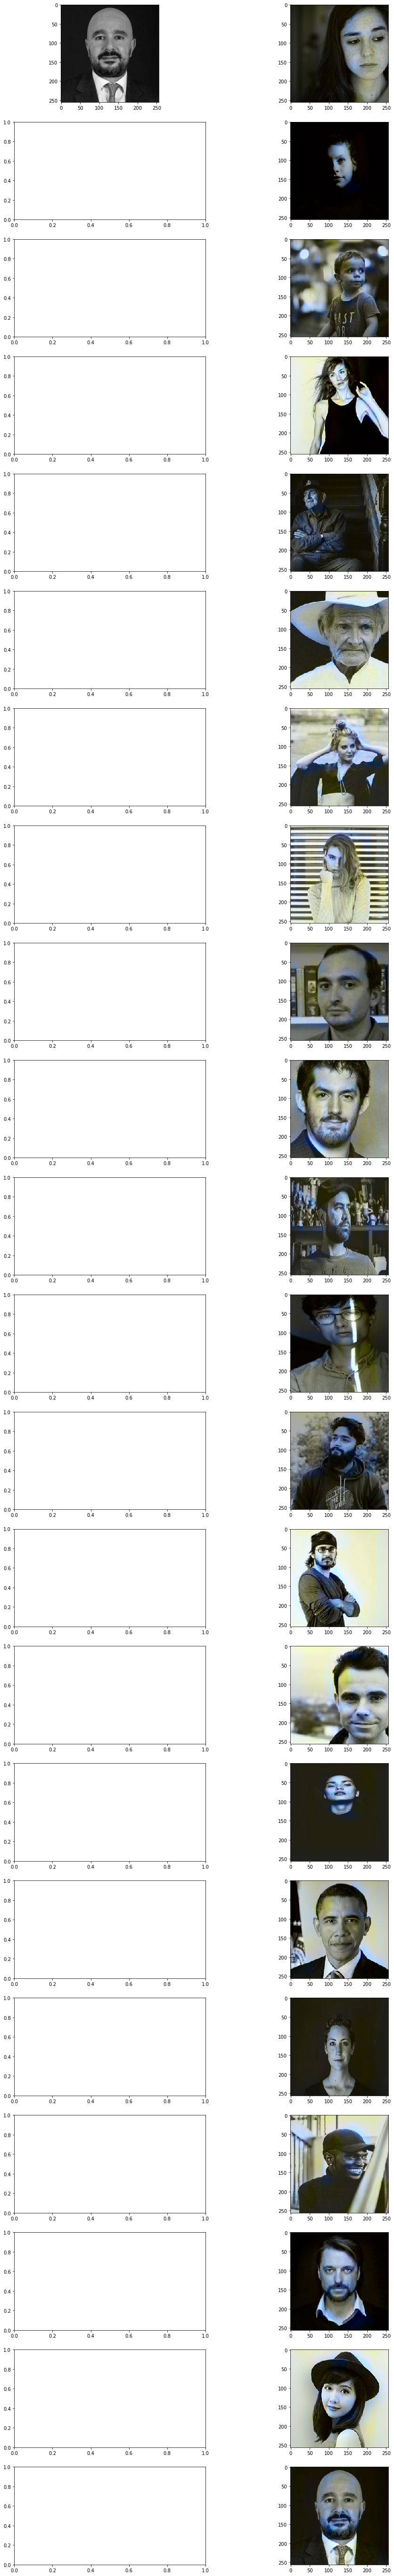

In [130]:

fig, ax = plt.subplots(22, 2, figsize=(16,100))
row = 0
colorize = []
print('Output of the Model')
for filename in os.listdir('Dataset/Test/'):
    img = cv2.imread('Dataset/Test/'+ str(filename))
    colorize.append(img)
    ax[row,0].imshow(img)

colorize = np.array(colorize, dtype=float)
colorize = rgb2lab(1.0/255*colorize)[:,:,:,0]
colorize = colorize.reshape(colorize.shape+(1,))


# Test model
output = model.predict(colorize)
output = output * 128

row = 0

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = colorize[i][:,:,0]
    cur[:,:,1:] = output[i]
    resImage = lab2rgb(cur)
    ax[row,1].imshow(resImage, interpolation='nearest')
    row +=1
    